In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# importing the data set
az = pd.read_csv(r"C:\Users\HP\Downloads\alzheimers_disease_data.csv")
pd.set_option('display.max_columns', None)
az.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [3]:
az.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [4]:
az.duplicated().sum()

0

In [5]:
az.isna().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [6]:
az = az.drop(['DoctorInCharge', 'PatientID'], axis = 1)
az.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0


### EXPLORATION DATA ANALYSIS

<Axes: xlabel='Age', ylabel='Density'>

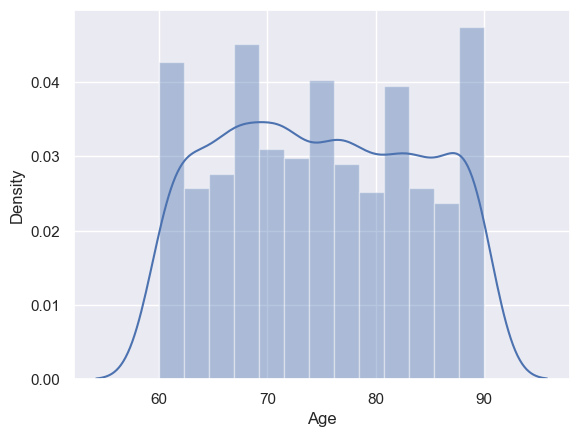

In [8]:
sns.distplot(az['Age'])

<Axes: xlabel='Diagnosis', ylabel='Age'>

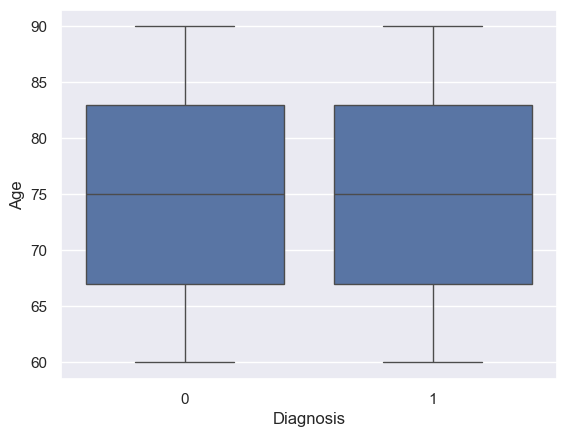

In [9]:
sns.boxplot(data = az , x='Diagnosis',y='Age')

<Axes: xlabel='Diagnosis', ylabel='AlcoholConsumption'>

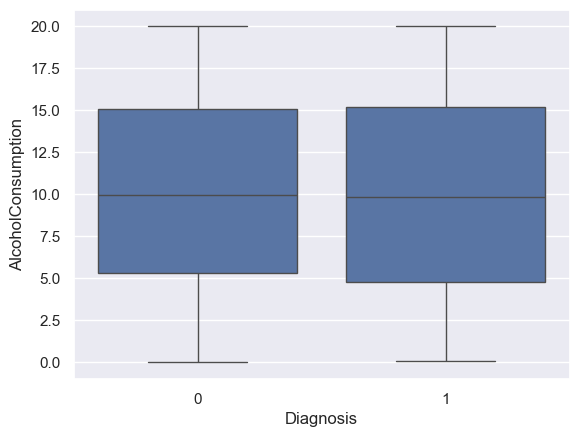

In [10]:
sns.boxplot(data = az , x='Diagnosis',y='AlcoholConsumption')

<Axes: xlabel='Diagnosis', ylabel='DietQuality'>

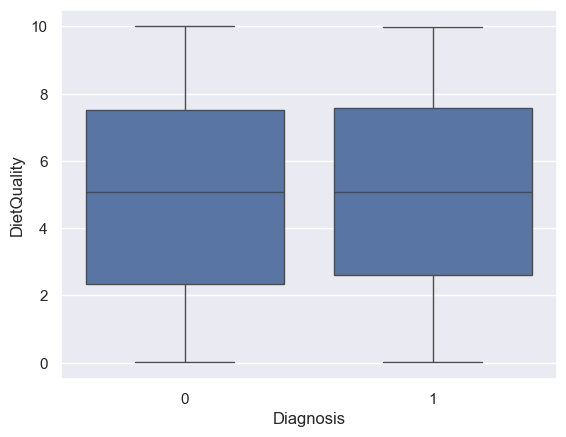

In [11]:
sns.boxplot(data = az , x='Diagnosis',y='DietQuality')

<Axes: xlabel='Diagnosis', ylabel='CholesterolTotal'>

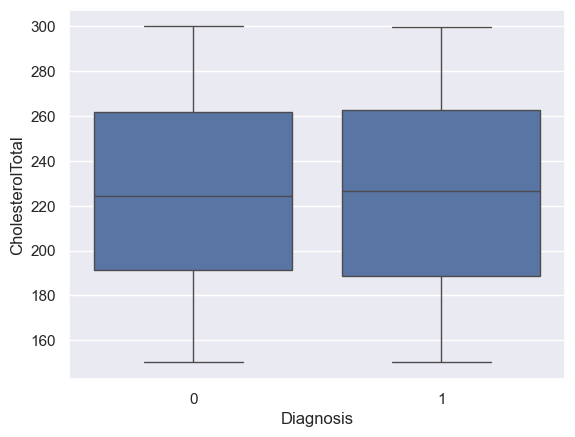

In [12]:
sns.boxplot(data = az , x='Diagnosis',y='CholesterolTotal')

<Axes: xlabel='Diagnosis', ylabel='count'>

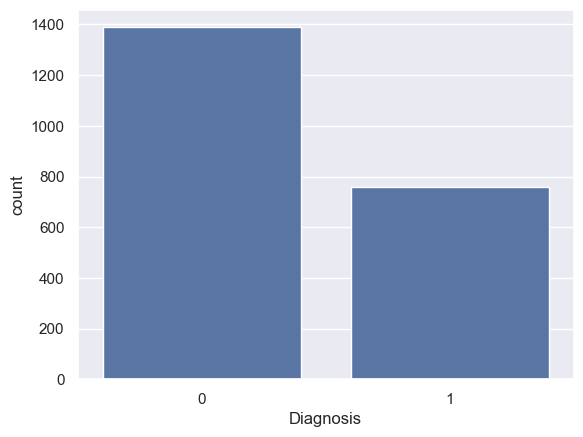

In [13]:
sns.countplot(data = az , x='Diagnosis')

<Axes: xlabel='EducationLevel', ylabel='count'>

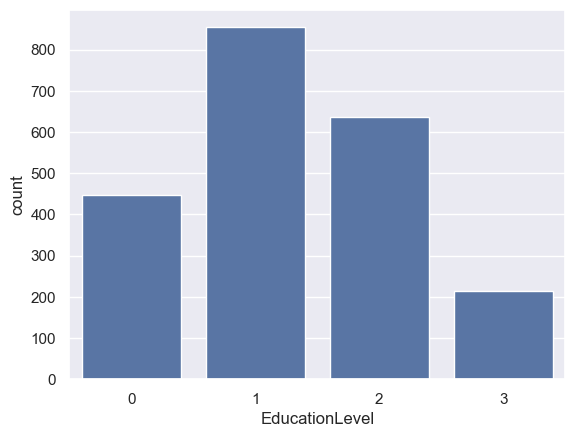

In [14]:
sns.countplot(data = az , x='EducationLevel', order = sorted(az['EducationLevel'].unique()))

<Axes: xlabel='Smoking', ylabel='count'>

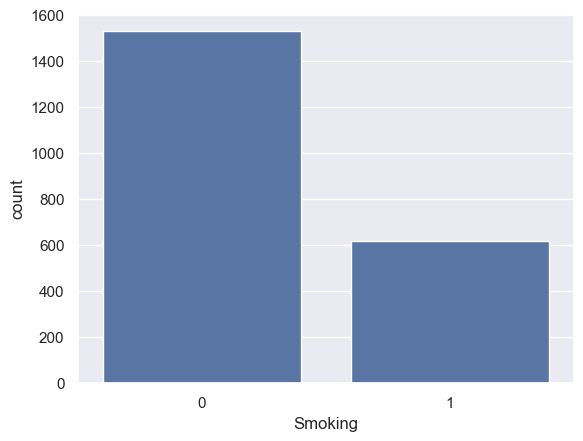

In [15]:
sns.countplot(data = az , x='Smoking')

<Axes: xlabel='Hypertension', ylabel='count'>

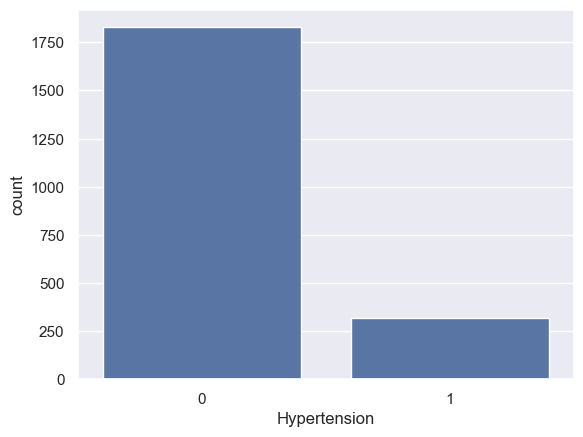

In [16]:
sns.countplot(data = az , x='Hypertension')

In [17]:
corr = az.corr()
corr

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
Age,1.000000,0.028708,0.027745,-0.060560,-0.015677,0.020060,0.007323,-0.010249,-0.023386,0.049139,-0.018784,-0.015284,-0.005708,-0.008752,-0.040337,0.003954,-0.005324,-0.004462,0.000392,0.003588,0.006803,-0.003062,-0.004235,0.005508,0.012343,0.038973,-0.038658,0.009002,0.027523,-0.009470,0.013900,-0.019279,-0.005488
Gender,0.028708,1.000000,-0.003660,-0.007070,0.005928,0.016650,0.004330,-0.035795,0.010942,0.007310,0.018421,0.034577,-0.018300,0.018113,0.004013,-0.002641,0.011657,-0.026059,-0.009568,0.016271,-0.005846,-0.012427,0.025330,0.033324,0.003880,0.006099,0.003865,-0.030583,0.017506,0.025919,-0.001636,-0.028537,-0.020975
Ethnicity,0.027745,-0.003660,1.000000,0.026516,-0.003176,0.031485,0.008363,0.020498,-0.018184,0.029304,0.022526,0.002347,-0.019588,-0.005411,-0.009364,0.012848,-0.027086,0.010310,-0.011757,0.007907,-0.021828,-0.007173,-0.012504,-0.004704,0.003687,-0.019363,0.010475,0.022431,-0.018132,-0.030035,0.019363,-0.034619,-0.014782
EducationLevel,-0.060560,-0.007070,0.026516,1.000000,-0.023514,-0.009904,-0.012646,-0.016703,0.017412,0.020248,0.032748,0.007528,0.003059,0.027573,-0.008951,-0.016950,-0.016782,-0.002553,-0.041598,0.050504,-0.008125,-0.025763,0.026090,0.020269,-0.000165,0.010473,0.031934,-0.008168,-0.017568,-0.019950,0.013033,-0.008685,-0.043966
BMI,-0.015677,0.005928,-0.003176,-0.023514,1.000000,0.020437,-0.008997,0.000742,0.019922,-0.005975,0.006446,-0.005467,-0.008980,-0.012507,0.016288,0.004928,-0.019275,-0.002524,0.001082,0.023684,0.038605,-0.018001,-0.003477,-0.030501,0.029293,0.035276,-0.009788,-0.015859,-0.031840,-0.015901,-0.039400,0.071131,0.026343
Smoking,0.020060,0.016650,0.031485,-0.009904,0.020437,1.000000,0.008363,0.010760,-0.002048,-0.001145,-0.045811,0.027955,-0.035810,-0.039363,-0.019178,-0.021124,-0.024116,-0.014112,-0.010907,-0.007393,-0.025567,-0.021058,0.002139,-0.031879,0.020339,-0.014763,-0.029233,0.004498,-0.028403,-0.009977,0.001741,0.018011,-0.004865
AlcoholConsumption,0.007323,0.004330,0.008363,-0.012646,-0.008997,0.008363,1.000000,0.021696,0.020117,-0.003873,-0.003707,-0.023632,0.000073,0.008867,-0.008301,-0.006010,-0.030070,-0.008909,-0.033944,-0.017042,-0.001925,0.023362,-0.011424,-0.016483,-0.029418,0.013657,-0.008250,-0.032798,0.015521,0.019117,-0.002712,-0.024121,-0.007618
PhysicalActivity,-0.010249,-0.035795,0.020498,-0.016703,0.000742,0.010760,0.021696,1.000000,0.011085,-0.001823,-0.014106,0.003976,0.029880,-0.013533,0.025780,0.022081,-0.004811,-0.010555,0.014335,0.017789,-0.001993,0.027416,-0.008342,-0.002419,0.008709,-0.014253,-0.013324,-0.009397,-0.020407,-0.013629,0.031169,0.009837,0.005945
DietQuality,-0.023386,0.010942,-0.018184,0.017412,0.019922,-0.002048,0.020117,0.011085,1.000000,0.051295,-0.011261,-0.015220,0.009192,-0.002516,-0.008163,-0.043628,0.006031,0.009539,-0.016790,-0.023698,-0.008659,0.034734,0.021636,-0.009700,0.012537,-0.014033,-0.007888,0.002628,-0.026271,0.029087,0.045737,0.006175,0.008506
SleepQuality,0.049139,0.007310,0.029304,0.020248,-0.005975,-0.001145,-0.003873,-0.001823,0.051295,1.000000,0.014801,0.002112,0.023987,-0.022996,-0.004546,0.038668,-0.027887,0.010797,0.006879,0.006751,0.015453,0.024004,0.012506,0.029589,-0.016807,-0.019899,0.014535,0.013508,0.019467,-0.016892,0.011237,0.002930,-0.056548


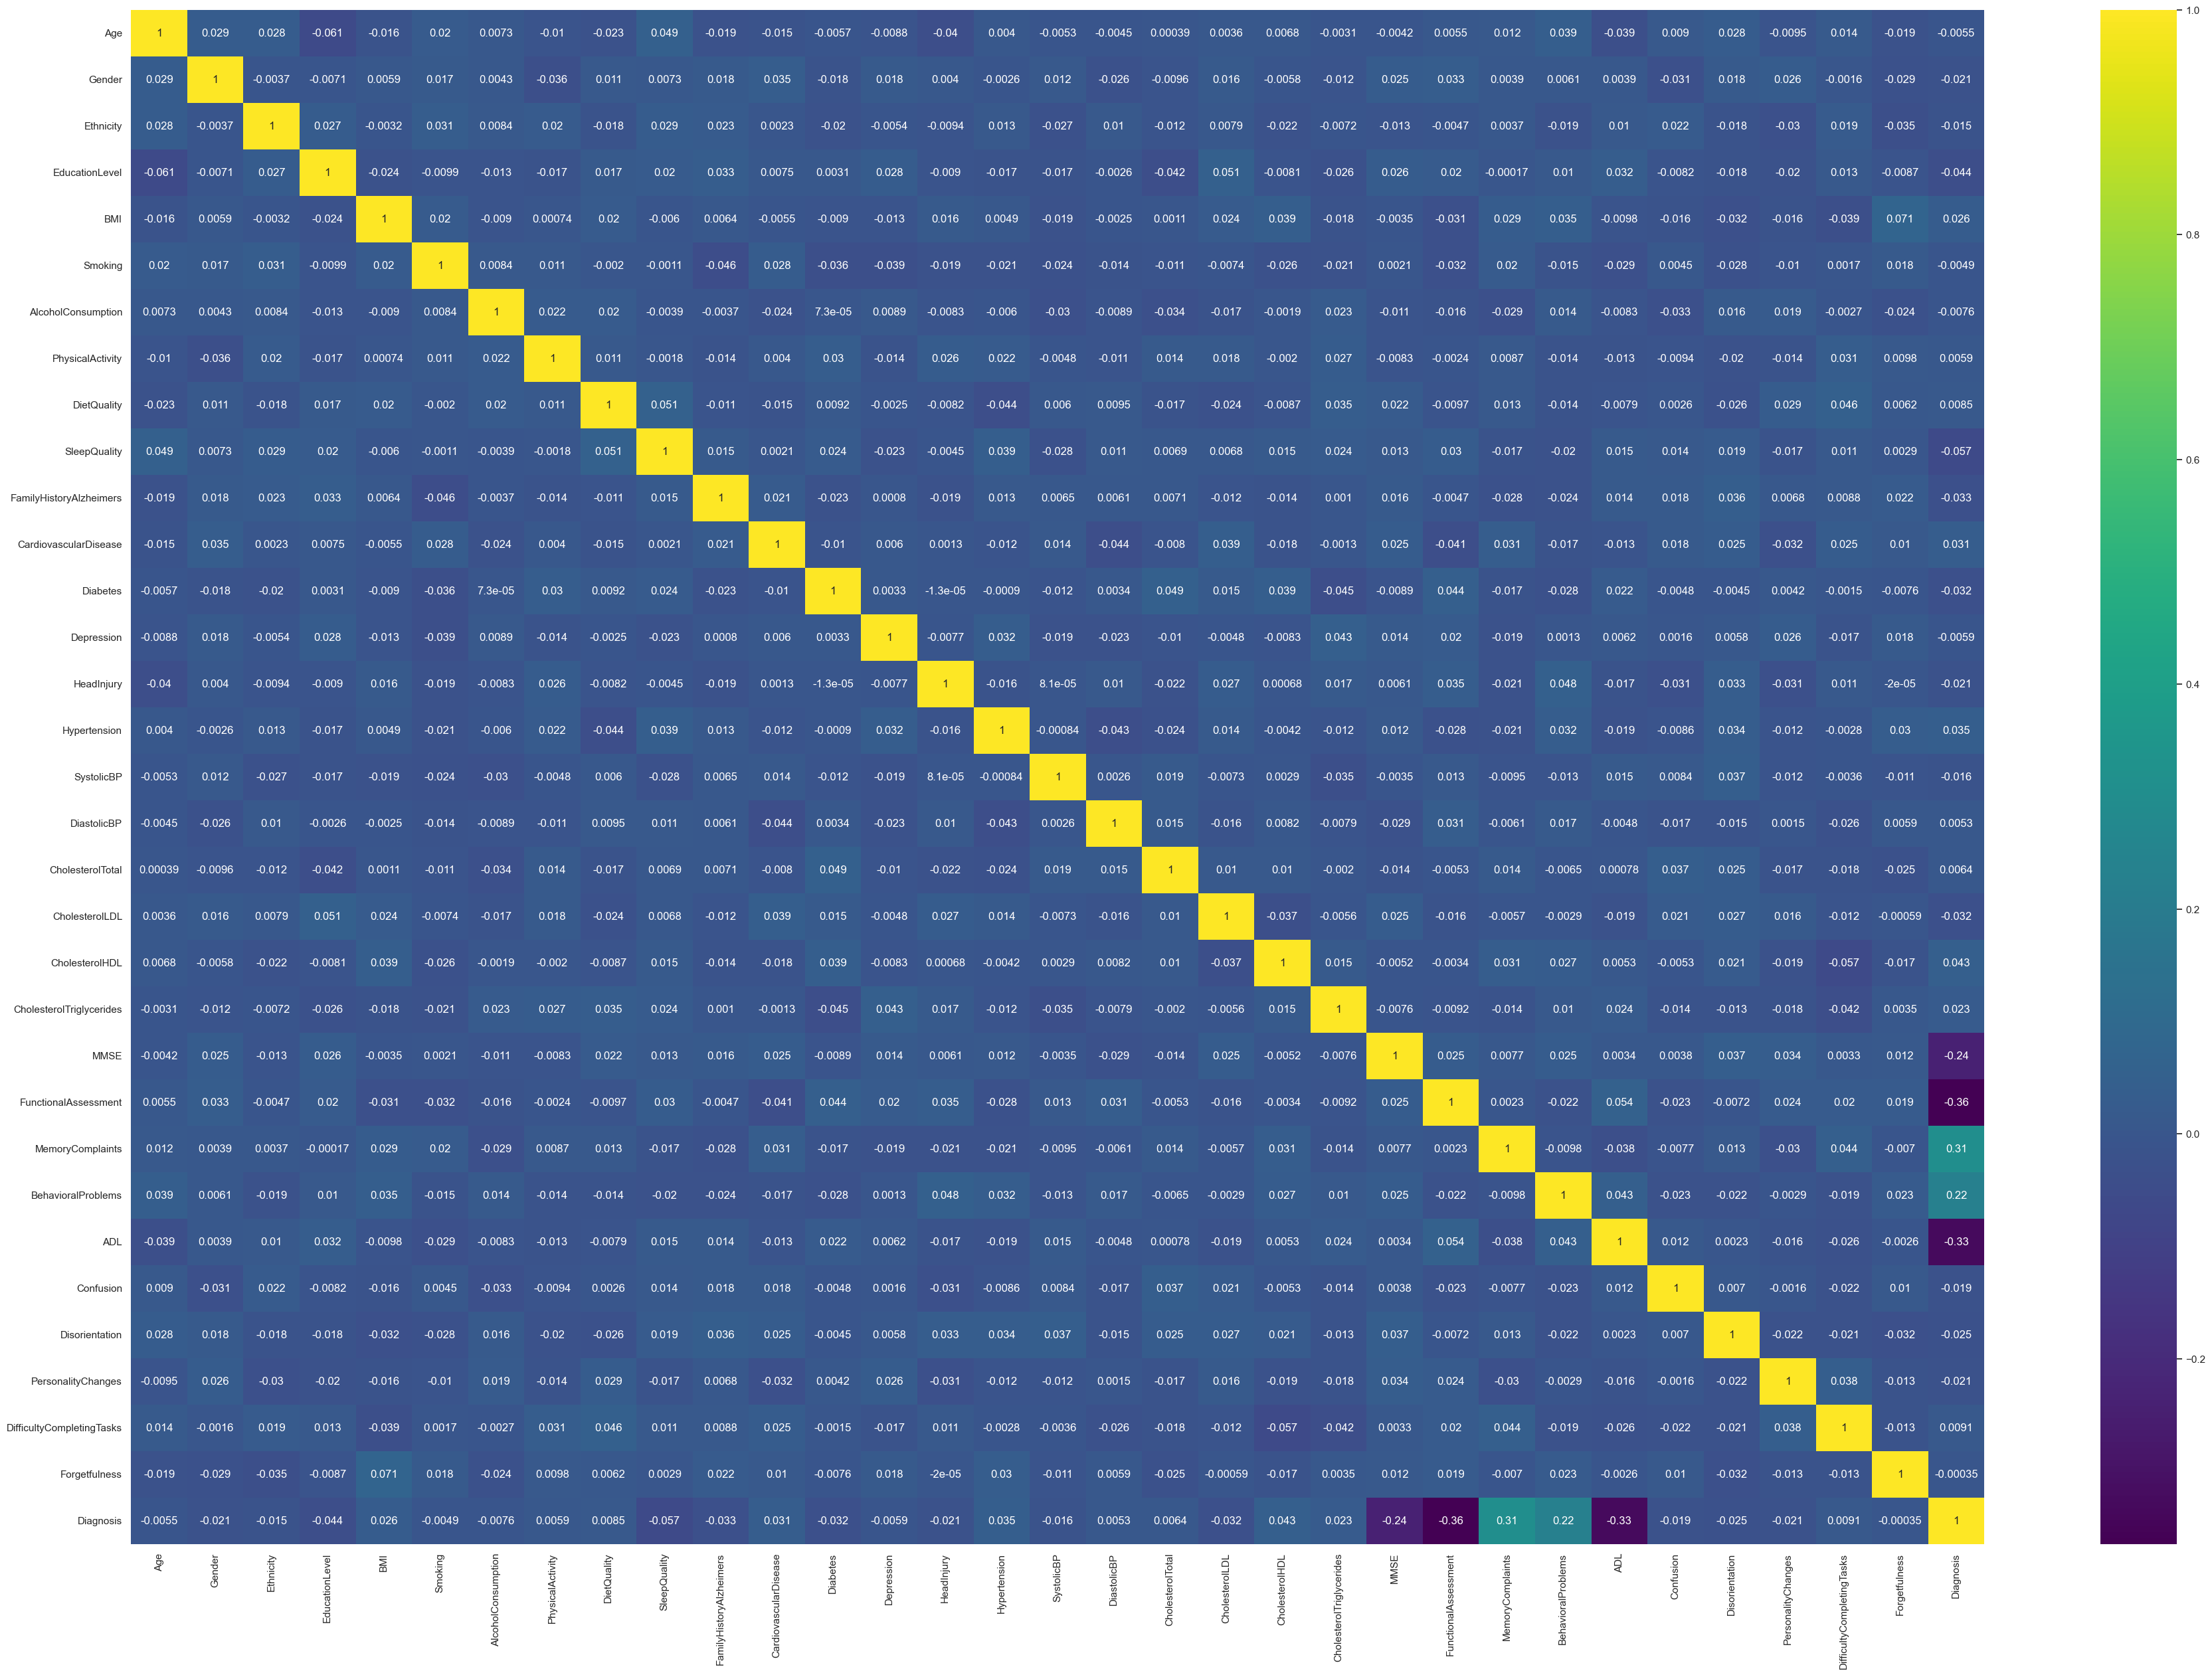

In [18]:
# visualizing the correlation using a heatmap
plt.figure(figsize=(45,30))
sns.heatmap(corr,annot = True,cmap= 'viridis')
plt.show()

MMSE	FunctionalAssessment	MemoryComplaints	BehavioralProblems	ADL

In [20]:
from sklearn.feature_selection import SelectKBest, f_classif

In [21]:
k = 6  # Number of features to select
selector = SelectKBest(score_func=f_classif, k=k)
top_x = selector.fit_transform(az.drop('Diagnosis', axis=1), az['Diagnosis'])

In [22]:
selector.get_feature_names_out()

array(['SleepQuality', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints',
       'BehavioralProblems', 'ADL'], dtype=object)

In [23]:
df = az[['Diagnosis', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints',
       'BehavioralProblems', 'ADL']]
df

,Diagnosis,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL
0,0,21.463532,6.518877,0,0,1.725883
1,0,20.613267,7.118696,0,0,2.592424
2,0,7.356249,5.895077,0,0,7.119548
3,0,13.991127,8.965106,0,1,6.481226
4,0,13.517609,6.045039,0,0,0.014691
...,...,...,...,...,...,...
2144,1,1.201190,0.238667,0,0,4.492838
2145,1,6.458060,8.687480,0,1,9.204952
2146,1,17.011003,1.972137,0,0,5.036334
2147,1,4.030491,5.173891,0,0,3.785399


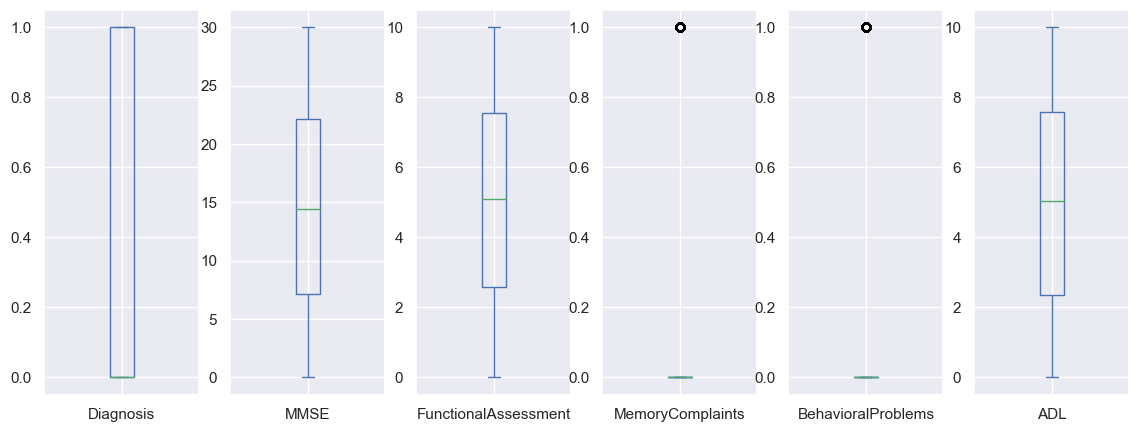

In [24]:
df.plot(
    kind = 'box',
    figsize = (14, 5),
    subplots = True
);

In [25]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = pd.DataFrame()

for column in df:
    outlier_mask = (df[column] < lower_bound[column]) | (df[column] > upper_bound[column])
    outliers = pd.concat([outliers, df[column][outlier_mask]], axis=1)
outliers.count()

Diagnosis                 0
MMSE                      0
FunctionalAssessment      0
MemoryComplaints        447
BehavioralProblems      337
ADL                       0
dtype: int64

In [26]:
outliers

,Diagnosis,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL
13,NaN,NaN,NaN,1.0,NaN,NaN
16,NaN,NaN,NaN,1.0,NaN,NaN
23,NaN,NaN,NaN,1.0,NaN,NaN
24,NaN,NaN,NaN,1.0,1.0,NaN
27,NaN,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...
2097,NaN,NaN,NaN,NaN,1.0,NaN
2126,NaN,NaN,NaN,NaN,1.0,NaN
2132,NaN,NaN,NaN,NaN,1.0,NaN
2145,NaN,NaN,NaN,NaN,1.0,NaN


<Axes: xlabel='MemoryComplaints', ylabel='Density'>

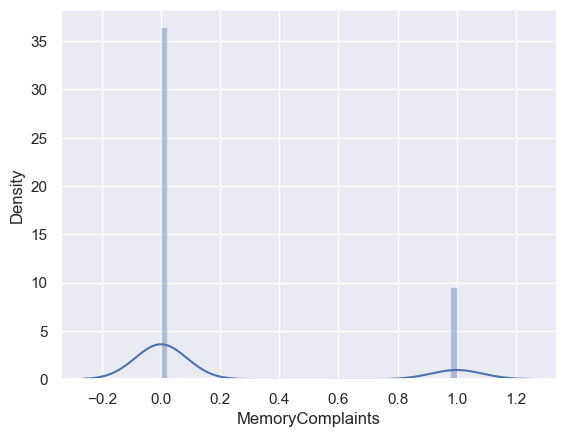

In [27]:
sns.distplot( df["MemoryComplaints"])

<Axes: xlabel='BehavioralProblems', ylabel='Density'>

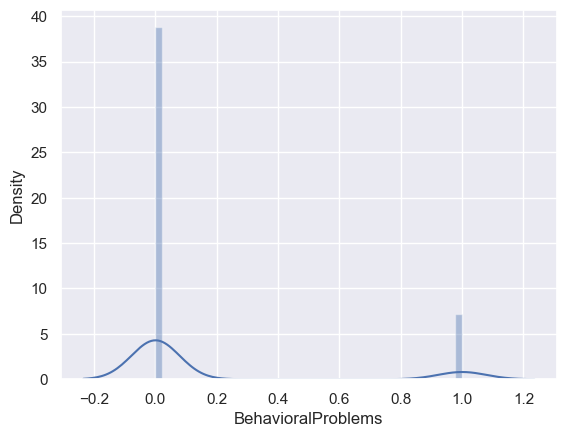

In [28]:
sns.distplot( df["BehavioralProblems"])

In [29]:
X = df.drop('Diagnosis', axis = 1)
y = df['Diagnosis']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

print(X_test.shape)
print(X_train.shape)

(538, 5)
(1611, 5)


In [31]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

<Axes: xlabel='Diagnosis', ylabel='count'>

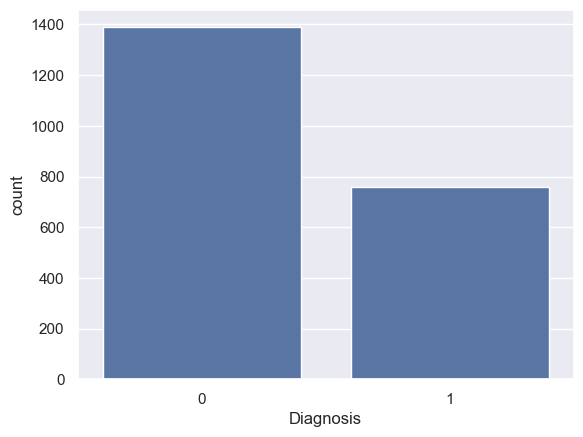

In [32]:
sns.countplot(data= df, x = y)

In [33]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train_scaled, y_train)
y_train_resampled.value_counts()

Diagnosis
0    1047
1    1047
Name: count, dtype: int64

### RANDOM FOREST

In [35]:
from sklearn.ensemble import RandomForestClassifier
#class_weights = {0: 1, 1: 3}
#n_estimators=50, max_depth=20, class_weight=class_weights, 
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_resampled, y_train_resampled)
y_pred_rfc = rfc.predict(X_test_scaled)

print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       342
           1       0.96      0.91      0.93       196

    accuracy                           0.95       538
   macro avg       0.96      0.94      0.95       538
weighted avg       0.95      0.95      0.95       538



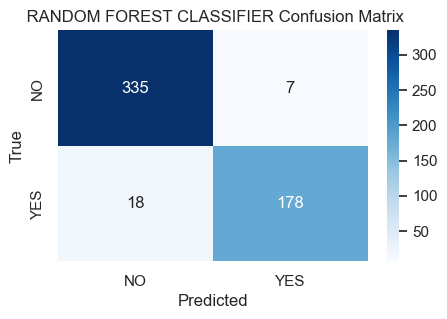

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_rfc)
cm = cm.reshape((2, 2))


plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(' RANDOM FOREST CLASSIFIER Confusion Matrix')
plt.show()

### XGBOOST CLASSIFIER

In [38]:
from xgboost import XGBClassifier

xg_clf = XGBClassifier(objective='binary:logistic', 
                         eval_metric='logloss') 
xg_clf.fit(X_train_resampled, y_train_resampled)
y_pred_xg_clf = xg_clf.predict(X_test_scaled)

print(classification_report(y_test,y_pred_xg_clf))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       342
           1       0.93      0.90      0.91       196

    accuracy                           0.94       538
   macro avg       0.94      0.93      0.93       538
weighted avg       0.94      0.94      0.94       538



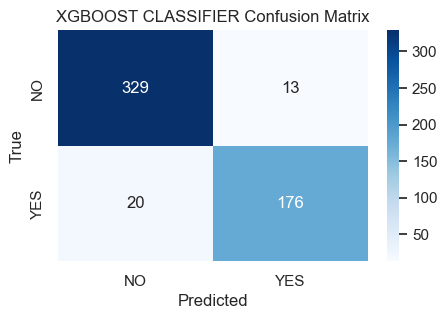

In [39]:
cm = confusion_matrix(y_test,y_pred_xg_clf)
cm = cm.reshape((2, 2))


plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('XGBOOST CLASSIFIER Confusion Matrix')
plt.show()

### GAUSSIAN NAVE BAYES

In [41]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_resampled, y_train_resampled)
y_pred_gnb = gnb.predict(X_test_scaled)

print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       342
           1       0.74      0.83      0.79       196

    accuracy                           0.83       538
   macro avg       0.82      0.83      0.83       538
weighted avg       0.84      0.83      0.84       538



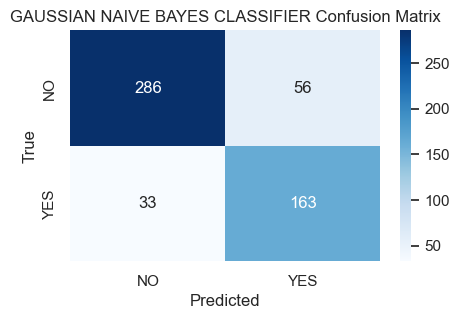

In [42]:
cm = confusion_matrix(y_test, y_pred_gnb)
cm = cm.reshape((2, 2))


plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('GAUSSIAN NAIVE BAYES CLASSIFIER Confusion Matrix')
plt.show()

#### BERNOULLI NB

In [44]:
from sklearn.naive_bayes import  BernoulliNB

bnb =  BernoulliNB()
bnb.fit(X_train_resampled, y_train_resampled)
y_pred_bnb = bnb.predict(X_test_scaled)

print(classification_report(y_test, y_pred_bnb))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79       342
           1       0.63      0.58      0.60       196

    accuracy                           0.72       538
   macro avg       0.70      0.69      0.69       538
weighted avg       0.72      0.72      0.72       538



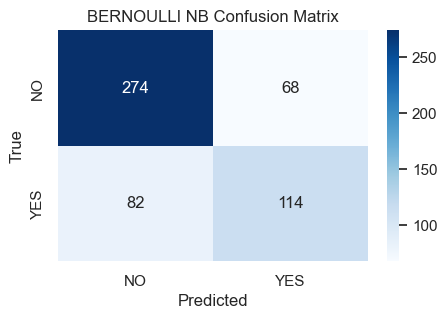

In [45]:
cm = confusion_matrix(y_test,y_pred_bnb)
cm = cm.reshape((2, 2))


plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('BERNOULLI NB Confusion Matrix')
plt.show()

### CATBOOST CLASSIFIER

In [47]:
from catboost import CatBoostClassifier
cat_clf = CatBoostClassifier(silent=True)
cat_clf.fit(X_train_resampled, y_train_resampled)
y_pred_cat = cat_clf.predict(X_test_scaled)

print(classification_report(y_test, y_pred_cat))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       342
           1       0.96      0.92      0.94       196

    accuracy                           0.96       538
   macro avg       0.96      0.95      0.95       538
weighted avg       0.96      0.96      0.96       538



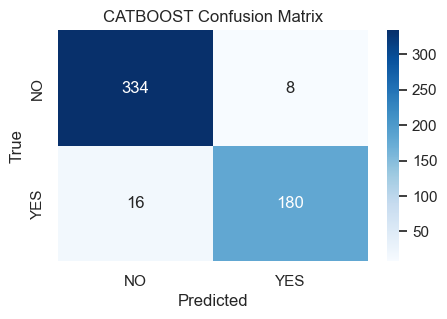

In [48]:
cm = confusion_matrix(y_test,y_pred_cat)
cm = cm.reshape((2, 2))


plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('CATBOOST Confusion Matrix')
plt.show()

### LIGHT GRADIENT BOOSTING  MACHINE

In [50]:
import lightgbm as lgb
lgbm_clf = lgb.LGBMClassifier()
lgbm_clf.fit(X_train_resampled, y_train_resampled)
y_pred_lgbm = lgbm_clf.predict(X_test_scaled)

print(classification_report(y_test, y_pred_lgbm))

[LightGBM] [Info] Number of positive: 1047, number of negative: 1047
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 2094, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       342
           1       0.95      0.91      0.93       196

    accuracy                           0.95       538
   macro avg       0.95      0.94      0.95       538
weighted avg       0.95      0.95      0.95       538



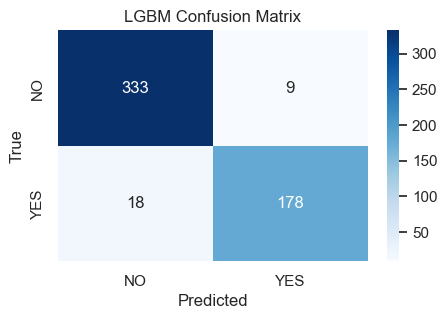

In [51]:
cm = confusion_matrix(y_test,y_pred_lgbm)
cm = cm.reshape((2, 2))


plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('LGBM Confusion Matrix')
plt.show()

### LOGISTIC REGRESSION

In [53]:
from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV(cv = 5)
lr.fit(X_train_resampled, y_train_resampled)
lr_pred = lr.predict(X_test_scaled)
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       342
           1       0.74      0.82      0.77       196

    accuracy                           0.83       538
   macro avg       0.81      0.82      0.82       538
weighted avg       0.83      0.83      0.83       538



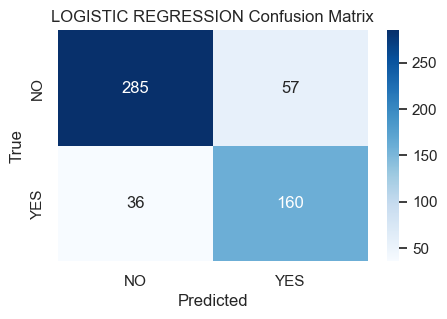

In [54]:
cm = confusion_matrix(y_test, lr_pred)
cm = cm.reshape((2, 2))


plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('LOGISTIC REGRESSION Confusion Matrix')
plt.show()

In [55]:
from sklearn.metrics import classification_report

models = [rfc, xg_clf, gnb, bnb, cat_clf, lgbm_clf, lr]
results_list = []

for model in models:
    y_pred = model.predict(X_test_scaled)
    
    report = classification_report(y_test, y_pred, output_dict=True)
    
    results_list.append({
        'Model': model.__class__.__name__,
        'Accuracy': report['accuracy'], 
        'Precision_0': report['0']['precision'], 
        'Precision_1': report['1']['precision'],
        'Recall_0': report['0']['recall'], 
        'Recall_1': report['1']['recall'],
        'F1_0': report['0']['f1-score'], 
        'F1_1': report['1']['f1-score'] 
    })

results_df = pd.DataFrame(results_list)
results_df

,Model,Accuracy,Precision_0,Precision_1,Recall_0,Recall_1,F1_0,F1_1
0,RandomForestClassifier,0.953532,0.949008,0.962162,0.979532,0.908163,0.964029,0.934383
1,XGBClassifier,0.938662,0.942693,0.931217,0.961988,0.897959,0.952243,0.914286
2,GaussianNB,0.834572,0.896552,0.744292,0.836257,0.831633,0.865356,0.785542
3,BernoulliNB,0.721190,0.769663,0.626374,0.801170,0.581633,0.785100,0.603175
4,CatBoostClassifier,0.955390,0.954286,0.957447,0.976608,0.918367,0.965318,0.937500
5,LGBMClassifier,0.949814,0.948718,0.951872,0.973684,0.908163,0.961039,0.929504
6,LogisticRegressionCV,0.827138,0.887850,0.737327,0.833333,0.816327,0.859729,0.774818


### VOTING CLASSIFIER

In [117]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define individual classifiers
clf_1 = LogisticRegression(random_state=42) 
clf_2 = DecisionTreeClassifier(random_state=42) 
clf_3 = XGBClassifier() 
#clf_4 = GaussianNB()  
clf_5 = RandomForestClassifier()  
clf_6 = lgb.LGBMClassifier()  
clf_7 = CatBoostClassifier()    

# Create a soft voting classifier with LGBM and CatBoost
voting_clf = VotingClassifier(estimators=[
    ('lr', clf_1),
    ('dt', clf_2),
    ('xgb',clf_3),
    #('nb', clf_4),
    ('rf', clf_5),
    ('lgbm', clf_6),
    ('cat', clf_7)], voting='soft')

# Train the voting classifier
voting_clf.fit(X_train_resampled, y_train_resampled)

# Predict on the test set and evaluate accuracy
y_pred = voting_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 1047, number of negative: 1047
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 2094, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Learning rate set to 0.014125
0:	learn: 0.6732966	total: 10.2ms	remaining: 10.2s
1:	learn: 0.6541989	total: 20ms	remaining: 10s
2:	learn: 0.6353899	total: 28.3ms	remaining: 9.39s
3:	learn: 0.6190913	total: 36.5ms	remaining: 9.08s
4:	learn: 0.6019233	total: 45.8ms	remaining: 9.11s
5:	learn: 0.5847031	total: 53.7ms	remaining: 8.9s
6:	learn: 0.5691405	total: 62.3ms	remaining: 8.84s
7:	learn: 0.5548319	total: 70.5ms	remaining: 8.74s
8:	learn: 0.5403448	total: 79ms	remaining: 8.7s
9:	learn: 0.5267539	t

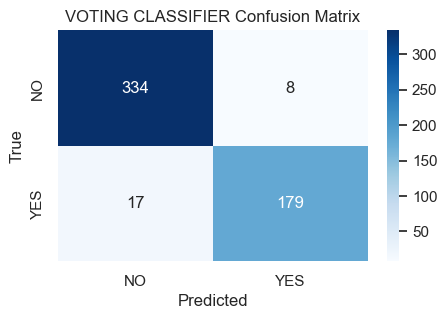

In [119]:
cm = confusion_matrix(y_test, y_pred)
cm = cm.reshape((2, 2))


plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('VOTING CLASSIFIER Confusion Matrix')
plt.show()

In [59]:
from sklearn.metrics import classification_report

models = [rfc, xg_clf, gnb, bnb, cat_clf, lgbm_clf, lr, voting_clf]
results_list = []

for model in models:
    y_pred = model.predict(X_test_scaled)
    
    report = classification_report(y_test, y_pred, output_dict=True)
    
    results_list.append({
        'Model': model.__class__.__name__,
        'Accuracy': report['accuracy'], 
        'Precision_0': report['0']['precision'], 
        'Precision_1': report['1']['precision'],
        'Recall_0': report['0']['recall'], 
        'Recall_1': report['1']['recall'],
        'F1_0': report['0']['f1-score'], 
        'F1_1': report['1']['f1-score'] 
    })

results_df = pd.DataFrame(results_list)
results_df

,Model,Accuracy,Precision_0,Precision_1,Recall_0,Recall_1,F1_0,F1_1
0,RandomForestClassifier,0.953532,0.949008,0.962162,0.979532,0.908163,0.964029,0.934383
1,XGBClassifier,0.938662,0.942693,0.931217,0.961988,0.897959,0.952243,0.914286
2,GaussianNB,0.834572,0.896552,0.744292,0.836257,0.831633,0.865356,0.785542
3,BernoulliNB,0.721190,0.769663,0.626374,0.801170,0.581633,0.785100,0.603175
4,CatBoostClassifier,0.955390,0.954286,0.957447,0.976608,0.918367,0.965318,0.937500
5,LGBMClassifier,0.949814,0.948718,0.951872,0.973684,0.908163,0.961039,0.929504
6,LogisticRegressionCV,0.827138,0.887850,0.737327,0.833333,0.816327,0.859729,0.774818
7,VotingClassifier,0.953532,0.951567,0.957219,0.976608,0.913265,0.963925,0.934726


In [121]:
import joblib
joblib.dump(cat_clf, 'Alzhiemer_model.pkl')
joblib.dump(scaler, 'Alzhiemer_scaler.pkl')

['Alzhiemer_scaler.pkl']